# APS1070 Week 7 Lecture Code

# Projections

In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

## Projection onto a Subspace
Projection onto a line (previous lecture) can be thought of as a projection onto a 1-d subspace. Now we will project onto a 2-d subspace.

In [3]:
# Example 3.11 from the textbook and the slides
# create our 2-d subspace, U, using two independent basis vectors
B = np.array([[1, 0], [1, 1], [1, 2]])
B

array([[1, 0],
       [1, 1],
       [1, 2]])

In [4]:
# create arbitrary vector x to project onto subspace U
x = np.array([[6], [0], [0]])
x

array([[6],
       [0],
       [0]])

The main formula is
$B^TB\lambda=B^Tx$

In [5]:
# Matrix in the left-hand side of the equation
B.T@B

array([[3, 3],
       [3, 5]])

In [6]:
# Right-hand side of the equation
B.T@x

array([[6],
       [0]])

In [7]:
# Solving for lambda
lam = np.linalg.solve(B.T@B, B.T@x)
lam

array([[ 5.],
       [-3.]])

In [8]:
# B lambda is the projection
proj = B@lam
proj

array([[ 5.],
       [ 2.],
       [-1.]])

In [9]:
#Projection error was np.sqrt(6)
np.linalg.norm(x-proj)

2.449489742783178

In [10]:
# The projection matrix
P = B@np.linalg.inv(B.T@B)@B.T
P

array([[ 0.83333333,  0.33333333, -0.16666667],
       [ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333,  0.83333333]])

In [11]:
# Confirming that PP=P
P@P

array([[ 0.83333333,  0.33333333, -0.16666667],
       [ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333,  0.83333333]])

In [12]:
P@x

array([[ 5.],
       [ 2.],
       [-1.]])

Visualize the projection of points onto a 2-d subspace

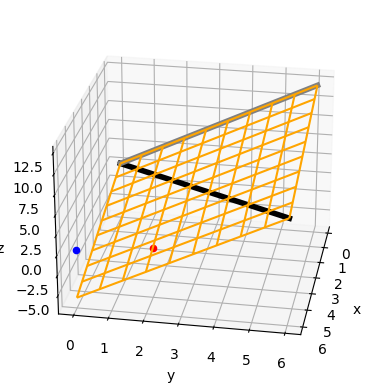

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

normal_to_plane = np.cross(B[:,0], B[:,1]) #more info here: https://math.stackexchange.com/questions/562123/equation-of-plane-containing-two-vectors

B_x, B_y = np.meshgrid(np.linspace(0, 6, 10), np.linspace(0, 6, 10))
B_z = (-normal_to_plane[0]*B_x - normal_to_plane[1]*B_y) / normal_to_plane[2] #based on algorithm here: https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib/23006541

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_wireframe(B_x, B_y, B_z, color = 'orange')

U1_x = np.linspace(0, 6, 10)
U1_y = B[1,0]/B[0,0]*U1_x
U1_z = B[2,0]/B[0,0]*U1_x
ax.plot3D(U1_x, U1_y, U1_z, 'black', linewidth=4)

U2_x = np.linspace(0,0,10)
U2_y = np.linspace(0, 6, 10)
U2_z = B[2,1]/B[1,1]*U2_y
ax.plot3D(U2_x, U2_y, U2_z, 'grey', linewidth=4)

Px = P@x

x_x = x[0]
x_y = x[1]
x_z = x[2]

Px_x = Px[0]
Px_y = Px[1]
Px_z = Px[2]

ax.scatter3D(x_x, x_y, x_z, color="b");
ax.scatter3D(Px_x, Px_y, Px_z, color="r");

# change the point of view
ax.view_init(25, 10)